In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
teis_df=pd.read_excel(r'C:\Users\Thund\NSS_Data_Analytics\Projects\TEIS\teis-concatahoula_leopards\data\BDI3 All Evals for NSS 11-2023.xlsx')

In [3]:
teis_df.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
teis_df.describe()

,Date of Birth,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive T-Score,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional T-Score,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication T-Score,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
count,23947,23939.000000,23939.000000,23939.000000,23927.000000,23927.000000,23927.000000,23912.000000,23912.000000,23912.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2021-07-14 14:17:15.186035712,11.728268,86.988304,41.326204,22.773770,94.293601,46.197476,13.020241,79.060723,36.040482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2019-10-15 00:00:00,1.000000,46.000000,14.000000,2.000000,46.000000,14.000000,2.000000,46.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2020-10-30 00:00:00,7.000000,76.000000,34.000000,17.000000,84.000000,39.000000,8.000000,64.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2021-06-03 00:00:00,11.000000,88.000000,42.000000,22.000000,94.000000,46.000000,13.000000,79.000000,36.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022-02-22 00:00:00,16.000000,100.000000,50.000000,28.000000,106.000000,54.000000,18.000000,94.000000,46.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2023-10-30 00:00:00,36.000000,148.000000,82.000000,53.000000,154.000000,86.000000,38.000000,154.000000,86.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,6.001474,17.689509,11.782294,7.700521,16.819322,11.215540,6.805753,20.417259,13.611506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
teis_df=teis_df.drop_duplicates()
teis_df.reset_index()
teis_df= teis_df.rename(columns={'Location - Sub Level 1':'Location'})

In [6]:
#data type checking cell:
type(teis_df['Adaptive RDI'][2])

str

In [7]:
teis_df=teis_df.drop(labels=['Code 1', 'Code 2', 'Code 3', 'Code 4', 'Code 5', 'Code 6', 'Code 7', 'Code 8', 'Code 9', 'Code 10'], axis='columns')

In [8]:
teis_df

,Child ID,Gender,Date of Birth,Location,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,9.0,13.0,84,12,98/90,411.0,392 - 431,1,60.0,71
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,11.0,7.0,16,18,29/90,437.0,421 - 453,– 1.00,40.0,29
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,10.0,7.0,16,15,37/90,426.0,408 - 444,– 1.00,40.0,29
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,9.0,10.0,50,12,92/90,411.0,392 - 431,0,50.0,50
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,10.0,10.0,50,15,88/90,426.0,408 - 444,0,50.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,6.0,15.0,95,6,>99/90,378.0,365 - 391,1.67,67.0,85
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,20.0,14.0,91,37,99/90,499.0,491 - 508,1.33,63.0,78
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,13.0,10.0,50,25,89/90,464.0,450 - 479,0,50.0,50
23945,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,23.0,9.0,37,40,75/90,507.0,500 - 515,– 0.33,47.0,43


In [9]:
teis_df.tail(3297)

#no_ids=teis_df.tail(3291)
#no_ids

,Child ID,Gender,Date of Birth,Location,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
20650,564281\t,F,2021-03-16,Upper Cumberland,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,90/90,...,21.0,13.0,84,38,98/90,502.0,494 - 511,1,60.0,71
20651,564679\t,M,2020-12-16,Southeast Tennessee,BDI-3 Eligibility Evaluation,18.0,94.0,34,87-101,82/90,...,12.0,6.0,9,22,1990-08-01 00:00:00,451.0,429 - 473,– 1.33,37.0,22
20652,565734\t,M,2022-02-16,Greater Nashville,BDI-3 Eligibility Evaluation,6.0,80.0,9,73-93,21/90,...,13.0,12.0,75,25,98/90,464.0,450 - 479,0.67,57.0,64
20653,565977\t,F,2022-04-21,Southeast Tennessee,BDI-3 Eligibility Evaluation,1.0,55.0,0.1,51-71,<1/90,...,8.0,5.0,5,8,1990-06-01 00:00:00,395.0,376 - 415,– 1.67,33.0,15
20654,566491\t,M,2021-06-04,East Tennessee,BDI-3 Eligibility Evaluation,13.0,79.0,8,73-87,53/90,...,13.0,9.0,37,25,73/90,464.0,450 - 479,– 0.33,47.0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,6.0,15.0,95,6,>99/90,378.0,365 - 391,1.67,67.0,85
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,20.0,14.0,91,37,99/90,499.0,491 - 508,1.33,63.0,78
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,13.0,10.0,50,25,89/90,464.0,450 - 479,0,50.0,50
23945,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,23.0,9.0,37,40,75/90,507.0,500 - 515,– 0.33,47.0,43


In [10]:
counts=teis_df.groupby('Location')['Child ID'].count().reset_index()
counts

,Location,Child ID
0,East Tennessee,3340
1,First Tennessee,1701
2,Greater Nashville,3436
3,Memphis Delta,2717
4,Northwest,955
5,South Central,2560
6,Southeast Tennessee,1583
7,Southwest,1100
8,Upper Cumberland,2021


In [11]:
level_counts = teis_df.groupby('Program Label')['Child ID'].count()
level_counts

Program Label
BDI-3 Annual Evaluation                6905
BDI-3 Eligibility Evaluation          12392
BDI-3 Milestone or Exit Evaluation      203
Name: Child ID, dtype: int64

In [12]:
domain_df= teis_df[['Child ID', 'Gender', 'Adaptive Developmental Quotient', 'Social-Emotional Developmental Quotient', 'Communication Developmental Quotient', 'Motor Developmental Quotient', 'Cognitive Developmental Quotient']]
domain_df

,Child ID,Gender,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient
0,44879,F,85.0,127.0,91.0,88.0,100.0
1,47795,F,88.0,104.0,97.0,102.0,100.0
2,54340,M,90.0,91.0,82.0,109.0,83.0
3,54344,F,115.0,103.0,88.0,91.0,113.0
4,54515,M,75.0,73.0,70.0,73.0,97.0
...,...,...,...,...,...,...,...
23942,SP03287,F,115.0,115.0,112.0,118.0,113.0
23943,SP03288,F,115.0,116.0,112.0,117.0,122.0
23944,SP03289,F,103.0,102.0,55.0,104.0,98.0
23945,SP03290,M,88.0,90.0,76.0,100.0,88.0


avg_per_domain = domain_df.describe().reset_index()
avg_per_domain

u_gender=domain_df.loc[domain_df['Gender']=='U']
u_gender

****Gathering Averages for each column****

In [13]:
adaptive_avg = domain_df.groupby('Gender')['Adaptive Developmental Quotient'].agg(np.mean).to_frame()
adaptive_avg


,Adaptive Developmental Quotient
Gender,
F,89.246515
M,86.281914
U,89.683673


In [14]:
social_avg = domain_df.groupby('Gender')['Social-Emotional Developmental Quotient'].agg(np.mean).to_frame()
social_avg

,Social-Emotional Developmental Quotient
Gender,
F,96.327993
M,93.385420
U,92.789116


In [15]:
#pulling two averaged columns into a shared data frame to build off of
average_df= adaptive_avg.merge(social_avg, how='outer', on='Gender')
average_df

,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient
Gender,,
F,89.246515,96.327993
M,86.281914,93.385420
U,89.683673,92.789116


****Averaging the rest of the columns****

In [16]:
comm_avg = domain_df.groupby('Gender')['Communication Developmental Quotient'].agg(np.mean).to_frame()
comm_avg

,Communication Developmental Quotient
Gender,
F,82.821952
M,77.534796
U,84.500000


In [17]:
motor_avg = domain_df.groupby('Gender')['Motor Developmental Quotient'].agg(np.mean).to_frame()
motor_avg

,Motor Developmental Quotient
Gender,
F,95.079773
M,94.057267
U,98.965986


In [18]:
cog_avg = domain_df.groupby('Gender')['Cognitive Developmental Quotient'].agg(np.mean).to_frame()
cog_avg

,Cognitive Developmental Quotient
Gender,
F,90.646547
M,87.968779
U,94.452381


average_df= adaptive_avg.merge(social_avg, how='outer', on='Gender')
average_df

average_df= average_df.merge(comm_avg, how='outer', on='Gender')
average_df

****Merging the averaged columns into 1 dataframe****

In [19]:
average_df= average_df.merge(comm_avg, how='outer', on='Gender')
average_df= average_df.merge(motor_avg, how='outer', on='Gender')
average_df= average_df.merge(cog_avg, how='outer', on='Gender')
average_df

,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient
Gender,,,,,
F,89.246515,96.327993,82.821952,95.079773,90.646547
M,86.281914,93.385420,77.534796,94.057267,87.968779
U,89.683673,92.789116,84.500000,98.965986,94.452381


<Axes: >

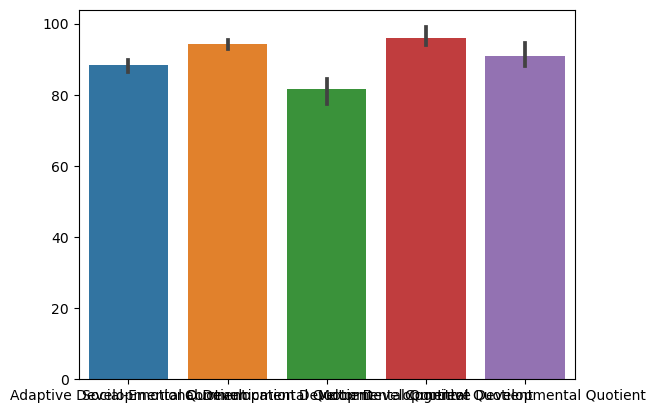

In [20]:
sns.barplot(data=average_df)